# Polynomial Regressoin 

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
x = 6 * np.random.rand(200, 1) - 3
y = 0.8* x**2 + 0.9*x + 2 + np.random.randn(200,1)

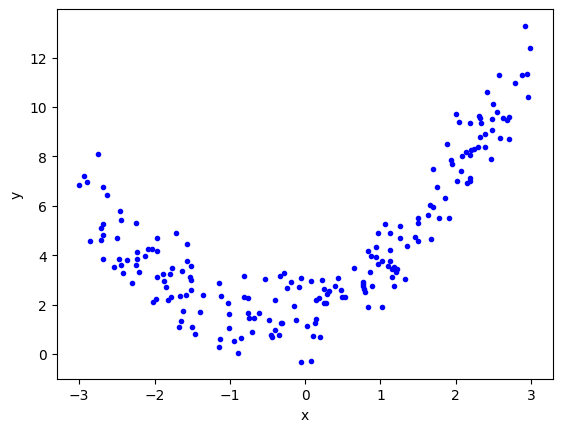

In [4]:
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=69)

In [6]:
poly = PolynomialFeatures(degree=2)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [7]:
def ploynomial_regression(degree):
    x_new = np.linspace(-3, 3, 100).reshape(100, 1)
    x_new_ploy = poly.transform(x_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    ploynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])

    ploynomial_regression.fit(x,y)
    y_newbig = ploynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig, 'r', label='degree'+ str(degree), linewidth = 2)

    plt.plot(x_train, y_train, 'b.', linewidth = 3)
    plt.plot(x_test, y_test, 'g.', linewidth = 3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-3, 3, 0, 10])
    plt.show()

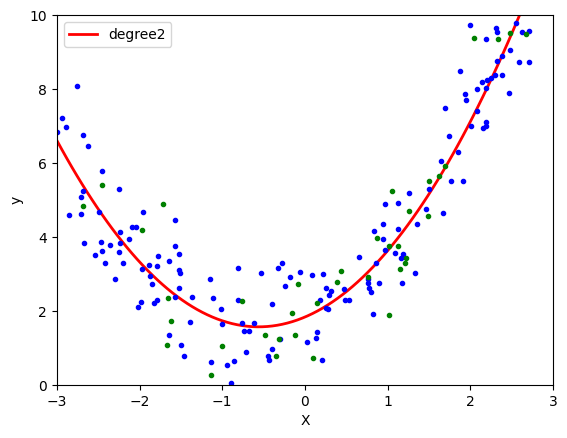

Cross-validated R^2 scores: [0.89513689 0.8779062  0.80210719 0.88969867 0.91013442]
Mean R^2 score: 0.8749966738548839


In [38]:
degree = 2
ploynomial_regression(degree)  # <-- This makes the plot

# Now add the cross-validation code in the next cell:
from sklearn.model_selection import cross_val_score

polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()

polynomial_regression_pipeline = Pipeline([
    ('poly_features', polybig_features),
    ('std_scaler', std_scaler),
    ('lin_reg', lin_reg)
])

scores = cross_val_score(polynomial_regression_pipeline, x, y, cv=5, scoring='r2')
print("Cross-validated R^2 scores:", scores)
print("Mean R^2 score:", scores.mean())